<a href="https://colab.research.google.com/github/rhehgus02/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD_%EA%B0%80%EC%9D%B4%EB%93%9C(16)_%EC%B0%A8%EC%9B%90_%EC%B6%95%EC%86%8C(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<09> 차원 축소**

## **1. 차원 축소(Dimension Reduction) 개요**

* 차원 축소: 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것

* 피처가 많으면 생기는 문제점

    * 일반적으로 차원이 증가할수록 데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되고 희소한 구조를 가지게 됨

    * 매우 많은 피처로 구성된 데이터 세트의 경우 상대적으로 적은 차원에서 학습된 모델보다 예측 신뢰도가 떨어짐

    * 피처가 많을 경우 개별 피처 간에 상관관계가 높을 가능성이 큼
        
        -> 선형 모델에서는 입력 변수 간의 상관관계가 높을 경우 이로 인한 다중 공산성 문제로 예측 성능이 저하됨

* 차원 축소의 장점

    * 다차원의 피처를 차원 축소해 피처 수를 줄이면 더 직관적으로 데이터를 해석할 수 있음

    * 3차원 이하의 차원 축소를 통해서 시각적으로 데이터를 압축해서 표현 가능

    * 학습 데이터의 크기가 줄어들어 학습에 필요한 처리 능력도 줄일 수 있음

* 차원 축소의 종류

    * 피처 선택: 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 것

    * 피처 추출: 기존 피처를 저차원의 중요 피처로 압축해서 추출하는 것

        -> 이렇게 새롭게 추출된 중요 특성은 기존의 피처가 압축된 것이므로 기존의 피처와는 완전히 다른 값이 됨

* 피처 추출은 기존 피처를 단순 압축하는 것이 아닌, 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것

    -> 이러한 함축적인 특성 추출은 기존 피처가 전혀 인지하기 어려웠던 잠재적인 요소를 추출하는 것

* PCA, SVD, NMF: 잠재적인 요소를 찾는 대표적인 차원 축소 알고리즘

    -> 매우 많은 차원을 가지고 있는 이미지나 텍스트에서 차원 축소를 통해 잠재적인 의미를 찾는 데에 활용




---

## **2. PCA(Principal Component Analysis)**

### **2-1. PCA 개요**

* PCA: 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법

    -> PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소, 이것이 PCA의 주성분이 됨

    -> 즉, 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주함

* 2개의 피처를 한 개의 주성분을 가진 데이터 세트로 차원 축소를 하는 예시

    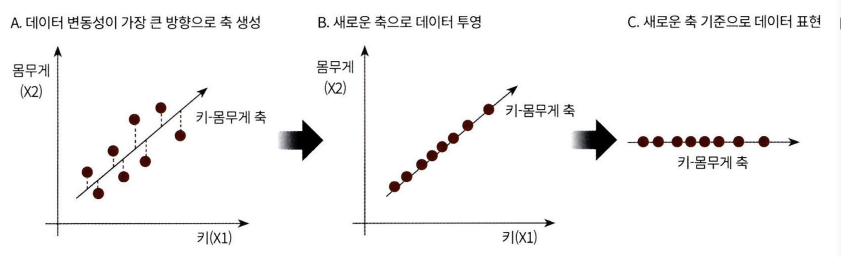

* 축의 설정

    * 제일 먼저 가장 큰 데이터 변동성(분산)을 기반으로 첫 번째 벡터 축을 생성

    * 두 번째 축은 이 벡터 축에 직각이 되는 벡터(직교 벡터)를 축으로 함

    * 세 번째 축은 다시 두 번째 축과 직각이 되는 벡터를 설정하는 방식으로 축을 생성

        -> 이렇게 생성된 벡터 축에 원본 데이터를 투영하면 벡터 축의 개수만큼의 차원으로 데이터가 축소됨

---

### **<선형 대수 개념>**

* 선형 변환: 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환하는 것

* 공분산: 두 변수 간의 변동

    * Cov(X, Y) > 0이면 X와 Y는 양의 선형 관계

    * Cov(X, Y) < 0이면 X와 Y는 음의 선형 관계

    * Cov(X, Y) = 0이면 X와 Y는 선형 관계 아님

* 공분산 행렬: 여러 변수와 관련된 공분산을 포함하는 정방향 행렬

    -> 공분산 행렬은 정방행렬이자 대칭행렬임

    -> 대칭행렬은 항상 고유벡터를 직교행렬로, 고유값을 정방행렬로 대각화할 수 있음

* 고유벡터: 행렬 A를 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터

    ex) Ax = ax (A는 행렬, x는 고유벡터, a는 고유값)

* 직교행렬: 정방행렬 A의 역행렬이 자신의 전치행렬과 같을 때, A를 직교행렬이라 함

* 공분산 행렬의 분해

    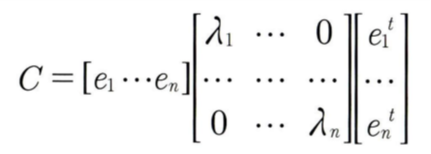

         C = (고유벡터 직교 행렬 * 고유값 정방 행렬 * 고유벡터 직교 행렬의 전치 행렬)

    * 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있음

     -> 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식 PCA임


---

* PCA 수행 과정

    * 입력 데이터 세트의 공분산 행렬을 생성한다.

    * 공분산 행렬의 고유벡터와 고유값을 계산한다.

    * 고유값이 가장 큰 순으로 K개만큼 고유벡터를 추출한다.

    * 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환한다.

* PCA에서 고유벡터: PCA의 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타냄

* PCA에서 고유값: 고유벡터의 크기 및 입력 데이터의 분산을 나타냄

---

### **2-2. 붓꽃 데이터 세트에 PCA 적용하기**

* 붓꽃 데이터 세트의 4가지 속성을 2개의 PCA 차원으로 압축하기

* PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향을 받음

    -> 따라서 PCA로 압축하기 전에 각 속성값을 동일한 스케일로 변환하는 것이 필요

* 사이킷런 `PCA`: PCA 클래스 제공

    * `n_components`: PCA로 변환할 차원의 수

    * `fit`과 `transform`을 호출해 PCA로 변환을 수행

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()

# 넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


* sepal length와 sepal width를 각각 x축, y축으로 하여 2차원으로 시각화

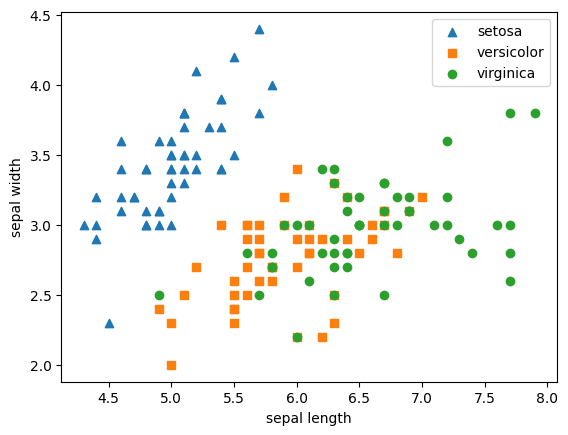

In [3]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

>> setosa의 경우sepal width가 3.0보다 크고 sepal length가 6.0 이하인 곳에 일정하게 분포돼 있음

>> versicolor와 virginica의 경우는 두 조건만으로 분류가 어려움

* StandardScaler를 이용해 평균이 0, 분산이 1인 표준정규분포로 변환

In [4]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

* 4차원의 붓꽃 데이터를 2차원 PCA 데이터로 변환

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


>> 원본 데이터 세트를 (150, 2)의 데이터 세트로 변환

* iris_pca 행렬을 데이터프레임으로 변환

In [7]:
# PCA 변환된 데이터의 칼럼 명을 각각 pca_component_1, pca_component_2로 명명
pca_colunms = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_colunms)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


* 2개의 속성으로 PCA 변환된 데이터 세트를 2차원 상에서 시각화

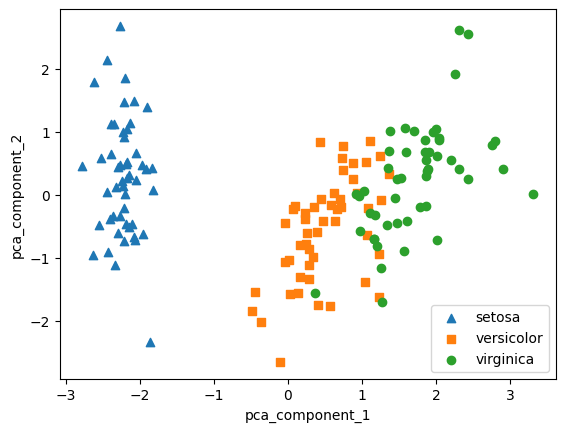

In [8]:
# setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers = ['^', 's', 'o']

# pca_component_1을 x축, pc_component_2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

>> PCA로 변환한 후에도 pca_component_1 축을 기반으로 setosa 품종은 명확하게 구분 가능

>> versicolor와 virginica도 비교적 잘 구분됨

>> PCA의 첫 번째 새로운 축인 pca_component_1이 원본 데이터의 변동성을 잘 반영했기 때문

* PCA component 별로 원본 데이터의 변동성을 얼마나 반영하고 있는지 알아보기

In [9]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


>> pca_component_1이 전체 변동성의 약 72.9%를 차지하며 pca_component_2가 약 22.8%를 차지

>> 따라서 PCA를 2개 요소로만 변환해도 원본 데이터의 변동성을 95% 설명할 수 있음

* 원본 붓꽃 데이터 세트와 PCA로 변환된 데이터 세트에 각각 분류를 적용한 후 결과 비교하기

* Estimator는 RandomForestClassifier를 이용하고, 3개의 교차 검증 세트로 정확도 결과를 비교

In [10]:
# 원본 붓꽃 데이터
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [11]:
# PCA 변환 데이터
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


>> 원본 데이터 세트 대비 예측 정확도는 PCA 변환 차원 개수에 따라 예측 성능이 떨어질 수밖에 없음

>> 그러나 속성 개수가 50% 감소한 것을 고려한다면 PCA 변환 후애도 원본 데이터의 특성을 상당 부분 유지하고 있는 것을 알 수 있음

---

### **2-3. 신용카드 고객 데이터 세트에 PCA 적용하기**

* 많은 피처를 가진 데이터 세트를 적은 PCA 컴포넌트 기반으로 변환한 뒤, 예측 영향도가 어떻게 되는지 변환된 PCA 데이터 세트에 기반해서 비교하기

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
# header로 의미 없는 첫 행 제거, iloc로 기존 id 제거
import pandas as pd

df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/ESAA/data/credit_card.xls", header=1, sheet_name='Data').iloc[0:, 1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


>> 30,000개의 레코드와 24개의 속성을 가지고 있음

>> target 값은 'default payment next month' 속성

>> target은 '다음달 연체 여부'를 의미하며 '연체'일 경우 1, '정상납부'가 0임



* 원본 데이터 세트에 PAY_0 다음에 PAY_2 칼럼이므로 PAY_0 칼럼명을 PAY_1로 변환

* target 칼럼명은 너무 길기 때문에 'default'로 이름 변경

In [17]:
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

* 해당 데이터 세트는 23개의 속성이 있으나 각 속성끼리 상관도가 매우 높음

* DataFrame의 corr()를 이용해 각 속성 간의 상관도를 구한 뒤, 이를 시본의 heatmap으로 시각화

<Axes: >

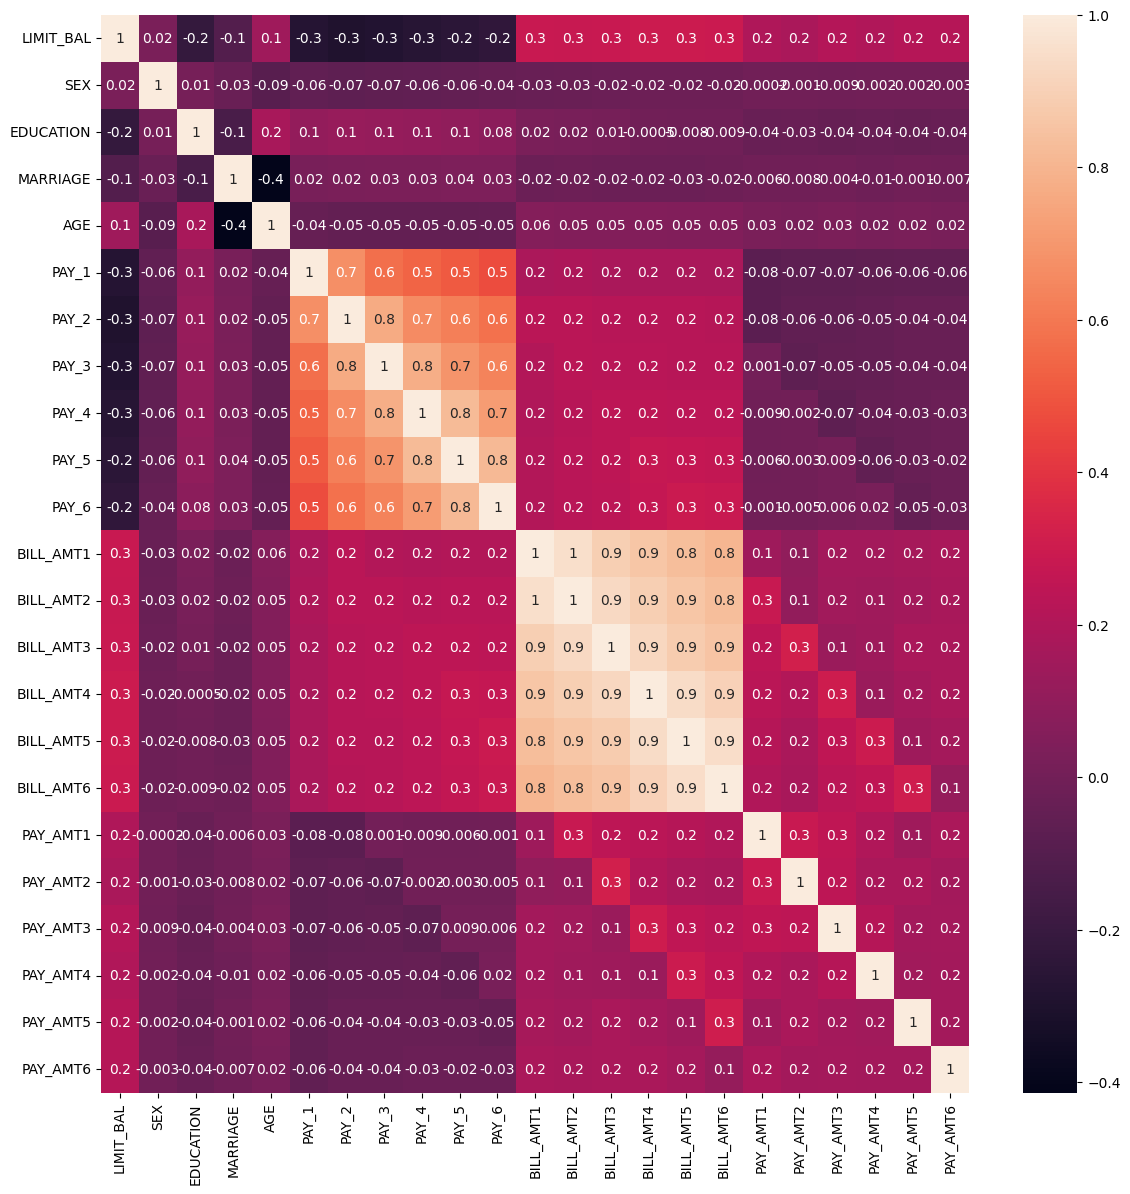

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

>> 'BILL_AMT1' ~ 'BILL_AMT6' 6개 속성끼리 상관도가 대부분 0.9 이상으로 매우 높음

>> 'PAY_1' ~ 'PAY_6'까지의 속성 역시 상관도가 높음

>> 높은 상관도를 가진 속성들은 소수의 PCA만으로도 자연스럽게 이 속성들의 변동성을 수용할 수 있음

* 'BILL_AMT1' ~ 'BILL_AMT6'까지의 6개 속성을 2개의 컴포넌트로 PCA 변환한 뒤, 개별 컴포넌트의 변동성 알아보기 

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1 ~ BILL_AMT6 6개 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:', cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산을 위해 fit() 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA component별 변동성: [0.90555253 0.0509867 ]


>> 단 2개의 PCA 컴포넌트만으로도 6개 속성의 변동성을 약 95% 이상 설명할 수 있음

>> 특히 첫 번째 PCA 축으로 90%의 변동성을 수용할 정도로 이 6개 속성의 상관도가 매우 높음

* 원본 데이터 세트와 6개의 컴포넌트로 PCA 변환한 데이터 세트의 분류 예측 결과를 상호 비교하기

In [21]:
# 원본 데이터 세트
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV가 3인 경우의 개별 Fold 세트별 정확도:', scores)
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

CV가 3인 경우의 개별 Fold 세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도: 0.8170


>> 3개의 교차 검증 세트에서 평균 예측 정확도는 약 81.7%를 나타냄


In [22]:
# 6개의 컴포넌트로 PCA 변환한 데이터 세트
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터 세트에 먼저 StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 컴포넌트를 가진 PCA 변환을 수행하고 cross_val_score()로 분류 예측 수행.
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scroes_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV가 3인 경우의 PCA 변환된 개별 Fold 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도: {0:.4f}'.format(np.mean(scores_pca)))

CV가 3인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 세트 평균 정확도: 0.8800


>> 전체 23개 속성의 약 1/4 수준인 6개의 PCA 컴포넌트만으로도 좋은 성능을 보여줌

---

## **3. LDA(Linear Discriminant Analysis)**


### **3-1. LDA 개요**

* LDA: PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법

* PCA와의 차이

    * LDA는 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소함

    * PCA는 입력 데이터의 변동성의 가장 큰 축을 찾았지만, LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾음

* LDA는 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산과 클래스 내부 분산의 비율을 최대화하는 방식으로 차원을 축소함

    -> 즉, 클래스간 분산은 최대한 크게 가져가고, 클래스 내부의 분산은 최대한 작게 가져가는 방식

    -> 따라서 공분산 행렬이 아니라 위에 설명한 클래스 간 분산과 클래스 내부 분산을 생성한 뒤, 이 행렬에 기반해 고유벡터를 구하고 입력 데이터를 투영함

* LDA 수행 과정

    * 클래스 내부와 클래스 간 분산 행렬을 구한다. 이 두 개의 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터를 기반으로 구한다.

    * 클래스 내부 분산 행렬을 SW, 클래스 간 분산 행렬을 SB라고 하면 다음 식으로 두 행렬을 고유벡터로 분해할 수 있다.

    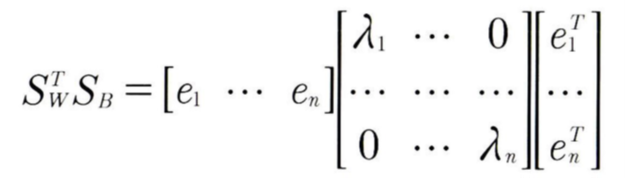

    * 고유값이 가장 큰 순으로 K개(LDA 변환 차수만큼) 추출한다.

    * 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환한다.

---

### **3-2. 붓꽃 데이터 세트에 LDA 적용하기**

* 사이킷런 `LinearDiscriminantAnalysis`: LDA 클래스 제공

* 데이터 세트를 로드하고 표준정규분포로 스케일링

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

* 2개의 컴포넌트로 데이터를 LDA 변환

* 비지도학습인 PCA와 다르게 LDA는 지도학습이므로 fit() 메서드에 클래스의 결정값이 필요!!

In [24]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


* LDA 변환된 입력 데이터 값을 2차원 평면에 품종별로 표현

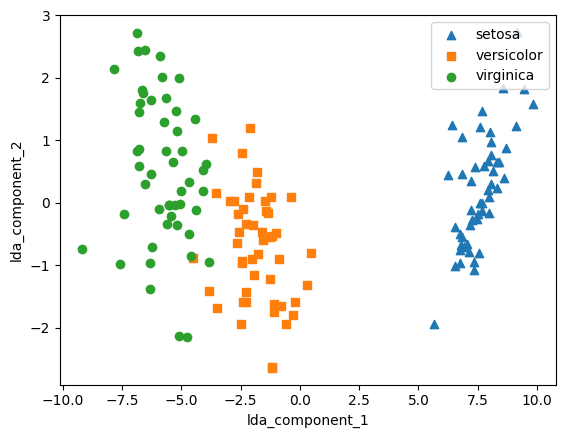

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target

# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()